<a href="https://colab.research.google.com/github/AUT-Student/CN-HW1/blob/main/Q2%5CComplexNetwork_HW1_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
graph.add_edges_from([(1,2), (0,1), (3,2)])

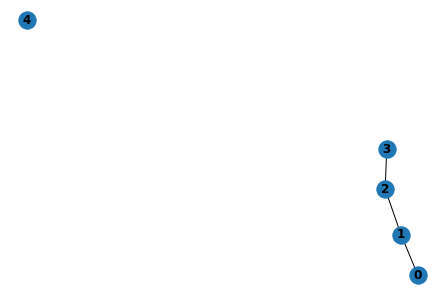

In [6]:
import matplotlib.pyplot as plt

nx.draw(graph, with_labels=True, font_weight='bold')

In [22]:
import networkx as nx
import random

class RandomGraph():
  def __init__(self, N, p):
    self.N = N
    self.p = p
    self.graph = None

  def generate_graph(self):
    self.graph = nx.Graph()
    self.graph.add_nodes_from(range(self.N))
    
    edges = []

    for i in range(self.N):
      for j in range(i+1, self.N):
        if random.random() < self.p:
          edges.append((i, j))

    self.graph.add_edges_from(edges)

  def get_largest_component_scale(self):
    largest_component_length = len(max(nx.connected_components(self.graph), key=len))
    largest_component_scale = largest_component_length / self.N 
    return largest_component_scale

In [27]:
random_graph = RandomGraph(N=1000, p=1)

In [28]:
random_graph.generate_graph()

In [12]:
max(nx.connected_components(graph), key=len)

{0, 1, 2, 3}